In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Pizza_ingredients.csv to Pizza_ingredients.csv
Saving Pizza_Sale.csv to Pizza_Sale.csv


In [ ]:
import pandas as pd

pizza_ingredients_df = pd.read_csv("Pizza_ingredients.csv")
pizza_sales_df = pd.read_csv("Pizza_Sale.csv")

print(pizza_ingredients_df.head())
print(pizza_sales_df.head())


  pizza_name_id                  pizza_name  pizza_ingredients  \
0     bbq_ckn_l  The Barbecue Chicken Pizza  Barbecued Chicken   
1     bbq_ckn_l  The Barbecue Chicken Pizza        Red Peppers   
2     bbq_ckn_l  The Barbecue Chicken Pizza      Green Peppers   
3     bbq_ckn_l  The Barbecue Chicken Pizza           Tomatoes   
4     bbq_ckn_l  The Barbecue Chicken Pizza         Red Onions   

   Items_Qty_In_Grams  
0                40.0  
1                15.0  
2                20.0  
3                30.0  
4                60.0  
   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1   1/1/2015   11:38:36   
1         2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2         3         2  five_cheese_l         1   1/1/2015   11:57:40   
3         4         2    ital_supr_l         1   1/1/2015   11:57:40   
4         5         2     mexicana_m         1   1/1/2015   11:57:40   

   unit_price  total_price

In [ ]:
print(pizza_ingredients_df.size)
print(pizza_ingredients_df.shape)
print(pizza_sales_df.size)
print(pizza_sales_df.shape)

2072
(518, 4)
583440
(48620, 12)


In [ ]:
print(pizza_ingredients_df.isnull().sum())
print(pizza_sales_df.isnull().sum())


pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64
pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


In [ ]:
# Fill missing Items_Qty_In_Grams with the median value
pizza_ingredients_df["Items_Qty_In_Grams"].fillna(pizza_ingredients_df["Items_Qty_In_Grams"].median(), inplace=True)


<ipython-input-5-01abbff0c47a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pizza_ingredients_df["Items_Qty_In_Grams"].fillna(pizza_ingredients_df["Items_Qty_In_Grams"].median(), inplace=True)


In [ ]:
pizza_sales_df.dropna(subset=["pizza_name_id"], inplace=True)

# Fill missing total_price by recalculating
pizza_sales_df["total_price"].fillna(pizza_sales_df["quantity"] * pizza_sales_df["unit_price"], inplace=True)

<ipython-input-6-39544fbd0292>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pizza_sales_df["total_price"].fillna(pizza_sales_df["quantity"] * pizza_sales_df["unit_price"], inplace=True)


In [ ]:
category_mode_mapping = pizza_sales_df.groupby("pizza_name")["pizza_category"].agg(lambda x: x.mode()[0])

pizza_sales_df["pizza_category"] = pizza_sales_df.apply(
    lambda row: category_mode_mapping[row["pizza_name"]] if pd.isnull(row["pizza_category"]) else row["pizza_category"],
    axis=1
)


In [ ]:
ingredients_mode_mapping = pizza_sales_df.groupby("pizza_name")["pizza_ingredients"].agg(lambda x: x.mode()[0])

pizza_sales_df["pizza_ingredients"] = pizza_sales_df.apply(
    lambda row: ingredients_mode_mapping[row["pizza_name"]] if pd.isnull(row["pizza_ingredients"]) else row["pizza_ingredients"],
    axis=1
)


In [ ]:
import pandas as pd

pizza_name_id_mode_mapping = pizza_sales_df.groupby("pizza_name")["pizza_name_id"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill missing values using the mapping
pizza_sales_df["pizza_name_id"] = pizza_sales_df.apply(
    lambda row: pizza_name_id_mode_mapping[row["pizza_name"]] if pd.isnull(row["pizza_name_id"]) else row["pizza_name_id"],
    axis=1
)

print("Missing values after filling:", pizza_sales_df["pizza_name_id"].isnull().sum())


Missing values after filling: 0


In [ ]:
# Create a mapping of pizza_name_id to its most frequent (mode) pizza_name
pizza_name_mode_mapping = pizza_sales_df.groupby("pizza_name_id")["pizza_name"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)


pizza_sales_df["pizza_name"] = pizza_sales_df.apply(
    lambda row: pizza_name_mode_mapping[row["pizza_name_id"]] if pd.isnull(row["pizza_name"]) else row["pizza_name"],
    axis=1
)


print("Missing values after filling:", pizza_sales_df["pizza_name"].isnull().sum())


Missing values after filling: 0


In [ ]:
pizza_sales_df.drop_duplicates(inplace=True)


In [ ]:
print(pizza_sales_df["order_date"].unique())  # Identify any inconsistencies
print(pizza_sales_df["order_time"].unique())


['1/1/2015' '2/1/2015' '3/1/2015' '4/1/2015' '5/1/2015' '6/1/2015'
 '7/1/2015' '8/1/2015' '9/1/2015' '10/1/2015' '11/1/2015' '12/1/2015'
 '13-01-2015' '14-01-2015' '15-01-2015' '16-01-2015' '17-01-2015'
 '18-01-2015' '19-01-2015' '20-01-2015' '21-01-2015' '22-01-2015'
 '23-01-2015' '24-01-2015' '25-01-2015' '26-01-2015' '27-01-2015'
 '28-01-2015' '29-01-2015' '30-01-2015' '31-01-2015' '1/2/2015' '2/2/2015'
 '3/2/2015' '4/2/2015' '5/2/2015' '6/2/2015' '7/2/2015' '8/2/2015'
 '9/2/2015' '10/2/2015' '11/2/2015' '12/2/2015' '13-02-2015' '14-02-2015'
 '15-02-2015' '16-02-2015' '17-02-2015' '18-02-2015' '19-02-2015'
 '20-02-2015' '21-02-2015' '22-02-2015' '23-02-2015' '24-02-2015'
 '25-02-2015' '26-02-2015' '27-02-2015' '28-02-2015' '1/3/2015' '2/3/2015'
 '3/3/2015' '4/3/2015' '5/3/2015' '6/3/2015' '7/3/2015' '8/3/2015'
 '9/3/2015' '10/3/2015' '11/3/2015' '12/3/2015' '13-03-2015' '14-03-2015'
 '15-03-2015' '16-03-2015' '17-03-2015' '18-03-2015' '19-03-2015'
 '20-03-2015' '21-03-2015' '22-03-2

In [ ]:
pizza_sales_df["order_date"] = pd.to_datetime(pizza_sales_df["order_date"], format="mixed", dayfirst=True)


pizza_sales_df["order_time"] = pd.to_datetime(pizza_sales_df["order_time"], format="%H:%M:%S", errors="coerce").dt.time



In [ ]:

# Check if any dates failed to convert
print(pizza_sales_df["order_date"].isna().sum())
print(pizza_sales_df[pizza_sales_df["order_date"].isna()])


0
Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


In [ ]:
pizza_sales_df["year"] = pizza_sales_df["order_date"].dt.year
pizza_sales_df["month"] = pizza_sales_df["order_date"].dt.month
pizza_sales_df["day"] = pizza_sales_df["order_date"].dt.day
pizza_sales_df["weekday"] = pizza_sales_df["order_date"].dt.day_name()
pizza_sales_df["week"] = pizza_sales_df["order_date"].dt.isocalendar().week


In [ ]:
pizza_sales_df["hour"] = pd.to_datetime(pizza_sales_df["order_time"], format="%H:%M:%S").dt.hour
pizza_sales_df["is_weekend"] = pizza_sales_df["weekday"].isin(["Saturday", "Sunday"]).astype(int)


In [ ]:
pizza_sales_df["revenue_per_pizza"] = pizza_sales_df["unit_price"] * pizza_sales_df["quantity"]


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pizza_sales_df["pizza_category_encoded"] = encoder.fit_transform(pizza_sales_df["pizza_category"])
pizza_sales_df["pizza_size_encoded"] = encoder.fit_transform(pizza_sales_df["pizza_size"])


In [ ]:
pizza_sales_df.to_csv("pizza_sales_cleaned.csv", index=False)
from google.colab import files
files.download("pizza_sales_cleaned.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-21-d4a46a37d244>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_sales.index, y=size_sales.values, ax=axes[0], palette="coolwarm")
<ipython-input-21-d4a46a37d244>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_sales.index, x=category_sales.values, ax=axes[1], palette="coolwarm")


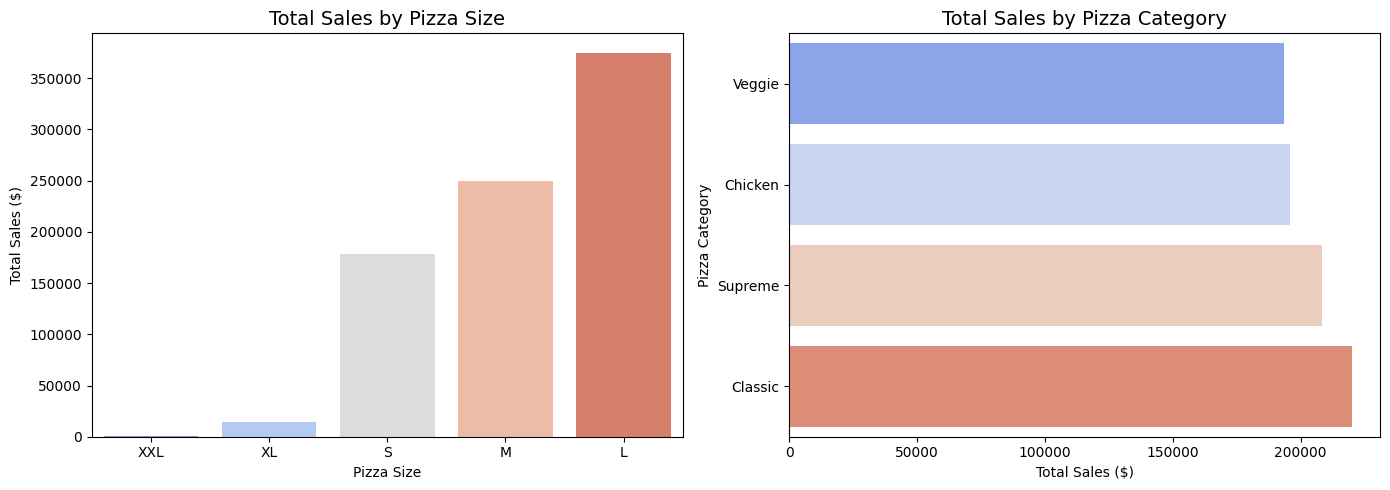

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group sales by pizza size
size_sales = pizza_sales_df.groupby("pizza_size")["total_price"].sum().sort_values()

# Group sales by pizza category
category_sales = pizza_sales_df.groupby("pizza_category")["total_price"].sum().sort_values()

# Plot sales by pizza size
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=size_sales.index, y=size_sales.values, ax=axes[0], palette="coolwarm")
axes[0].set_title("Total Sales by Pizza Size", fontsize=14)
axes[0].set_xlabel("Pizza Size")
axes[0].set_ylabel("Total Sales ($)")

# Plot sales by pizza category
sns.barplot(y=category_sales.index, x=category_sales.values, ax=axes[1], palette="coolwarm")
axes[1].set_title("Total Sales by Pizza Category", fontsize=14)
axes[1].set_xlabel("Total Sales ($)")
axes[1].set_ylabel("Pizza Category")

plt.tight_layout()
plt.show()
